# Algorithmic Trading

![image1](https://i.pinimg.com/736x/10/49/d9/1049d967d2562e97f43ba687c476ea77.jpg)

Technology has become an asset in finance: financial institutions are now evolving to technology companies rather than just staying occupied with just the financial aspect: besides the fact that technology brings about innovation the speeds and can help to gain a competitive advantage, the speed and frequency of financial transactions, together with the large data volumes, makes that financial institutions’ attention for technology has increased over the years and that technology has indeed become a main enabler in finance.

This project is divided into the following phases:
1. I'll do some commmon financial analyses, such as moving windows, volatility calculation etc with Pandas.
2. Development of a simple momentum strategy.
3. I'll backtest the formulated trading strategy with Pandas, zipline, Quantopian.
4. I'll perform some Optimizations to the developed strategy to make it perform better and will eventually evaluate the strategy's performance and robustness. 

# Importing Financial Data 

The quandl package allows for reading in data from sources such as Google, Yahoo! Finance, World Bank,… 

For more information on how you can use Quandl to get financial data directly into Python, go to https://www.quandl.com/tools/python

In [21]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2018-06-01")

In [23]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


This data contains the four columns with the **opening** and **closing price** per day and the **extreme high** and **low price** movements for the **Apple stock** for each day. Additionally, you also get two extra columns: **Volume** and **Adj Close**.

The former column is used to register the number of shares that got traded during a single day. The latter, on the other hand, is the adjusted closing price: it’s the closing price of the day that has been slightly adjusted to include any actions that occurred at any time before the next day’s open. You can use this column to examine historical returns or when you’re performing a detailed analysis on historical returns.

# Visualizing Time Series Data

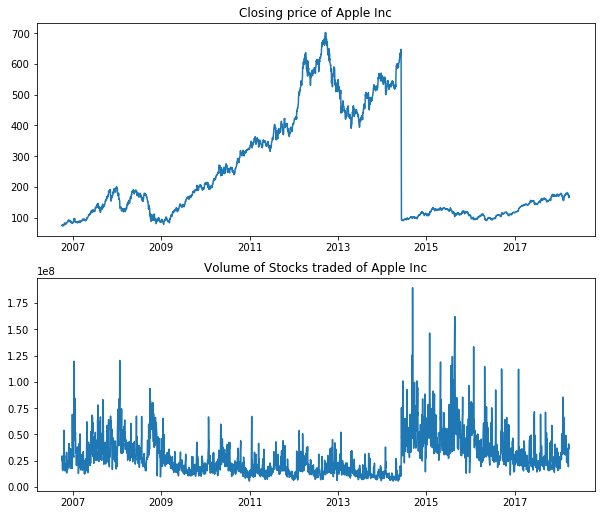

In [53]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)



# Plot the closing prices for `aapl`
fig,ax=plt.subplots(2,1,figsize=(10,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
ax[0].plot(aapl['Close'])
ax[0].set_title('Closing price of Apple Inc')

ax[1].plot(aapl['Volume'])
ax[1].set_title('Volume of Stocks traded of Apple Inc')


plt.show()

We can clearly see here that closing price of Apple went down in 2014 becasue of **stock split**. It issued more shares to its existing investors in order to bring down the price of the stock. Apple did this because it wanted its stocks to be more accessible to a large number of investors. Therefore, as the price went down we see increase in numeber of stocks traded.

# 1.Common Financial Analysis

It’s time to dive deeper into some of the common financial analyses that can be done so that a trading strategy can be developed.

## 1.1. Returns

The **simple daily percentage change** doesn’t take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading.

Note:I have calculated the log returns to get a better insight into the growth of returns over time.

In [62]:
import numpy as np

daily_close=aapl[['Adj. Close']]

daily_returns=daily_close.pct_change()

daily_returns.fillna(0,inplace=True)

print(daily_returns)

daily_log_returns=np.log(daily_returns+1)

print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2018-02-13    0.010018
2018-02-14    0.018437
2018-02-15    0.033578
2018-02-16   -0.003237
2018-02-20   -0.003364
2018-02-21   -0.004539
2018-02-22    0.008944
2018-02-23    0.017121
2018-02-26    0.019453
2018-02-27   -0.003241
2018-02-28 

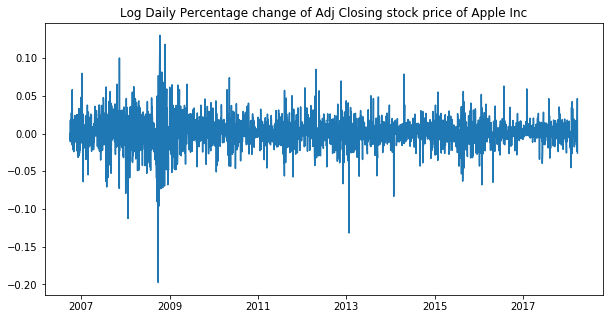

In [71]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(daily_log_returns)
ax.set_title('Log Daily Percentage change of Adj Closing stock price of Apple Inc')
plt.show()

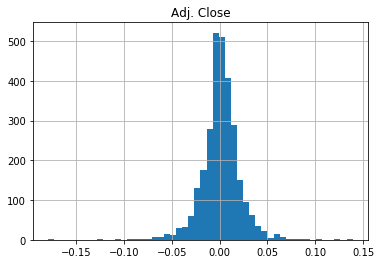

        Adj. Close
count  2889.000000
mean      0.001190
std       0.019938
min      -0.179195
25%      -0.007961
50%       0.000948
75%       0.011221
max       0.139050


In [80]:
#Plotting Distribution of daily_percenatge_returns

daily_returns.hist(bins=50)
plt.show()

print(daily_returns.describe())

The distribution looks very symmetrical and normally distributed: the daily changes center around the bin 0.00. We can see that the mean is very close to the 0.00 bin also and that the standard deviation is 0.02.

#### Calculating monthly and quaterly percentage returns

In [64]:
# Resample `aapl` to business months, take last observation as value 
monthly_returns = aapl.resample('BM').apply(lambda x: x[-1])

monthly_change=monthly_returns.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter_returns = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter_change=quarter_returns.pct_change()

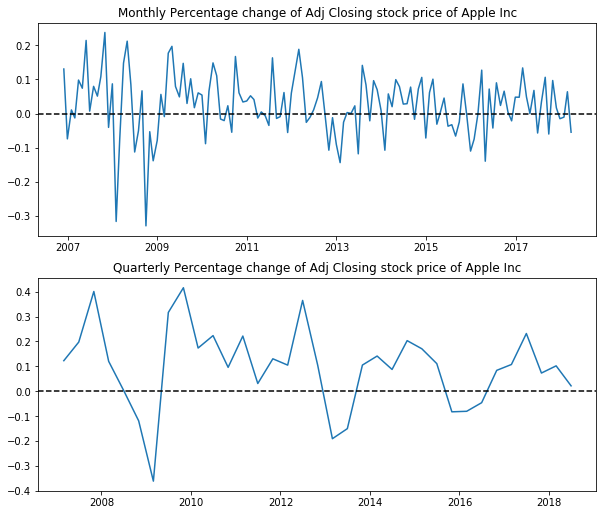

In [77]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.4, wspace=None, hspace=None)
ax[0].plot(monthly_change['Adj. Close'])
ax[0].set_title('Monthly Percentage change of Adj Closing stock price of Apple Inc')
ax[0].axhline(0,c='black',ls='--')

ax[1].plot(quarter_change['Adj. Close'])
ax[1].set_title('Quarterly Percentage change of Adj Closing stock price of Apple Inc')
ax[1].axhline(0,c='black',ls='--')

plt.show()

##### Cumulative Daily Return
The cumulative daily return in useful to determine the value of an investment at regular intervals

In [81]:
cum_daily_return=(1+daily_returns).cumprod()
print(cum_daily_return)

            Adj. Close
Date                  
2006-10-02    1.000000
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
2006-10-09    0.996928
2006-10-10    0.985974
2006-10-11    0.978226
2006-10-12    1.005343
2006-10-13    1.002137
2006-10-16    1.007213
2006-10-17    0.992386
2006-10-18    0.995592
2006-10-19    1.055170
2006-10-20    1.067994
2006-10-23    1.088165
2006-10-24    1.082688
2006-10-25    1.091103
2006-10-26    1.097916
2006-10-27    1.074138
2006-10-30    1.074272
2006-10-31    1.083088
2006-11-01    1.057441
2006-11-02    1.055036
2006-11-03    1.045819
2006-11-06    1.064788
2006-11-07    1.075474
2006-11-08    1.101389
2006-11-09    1.113278
2006-11-10    1.110339
...                ...
2018-02-13   17.082177
2018-02-14   17.397128
2018-02-15   17.981294
2018-02-16   17.923085
2018-02-20   17.862798
2018-02-21   17.781721
2018-02-22   17.940756
2018-02-23   18.247911
2018-02-26   18.602880
2018-02-27   18.542592
2018-02-28 

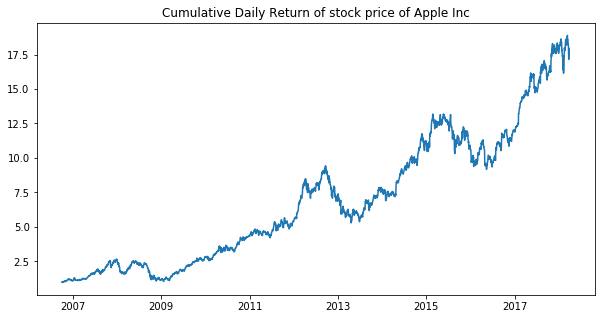

In [84]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(cum_daily_return)
ax.set_title('Cumulative Daily Return of stock price of Apple Inc')
plt.show()

We can clearly see that the cumulative daily returns of apples stock price is steadily increasing over time.

#### Calculating Cumulative monthly returns

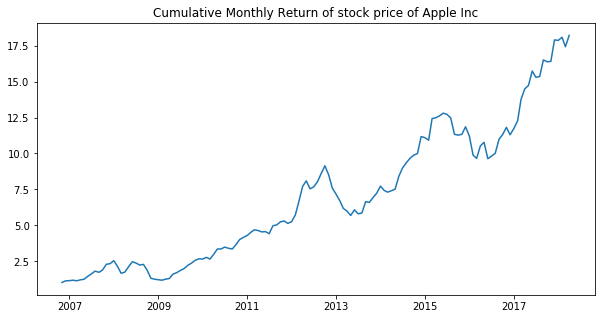

In [86]:
cum_monthly_return=cum_daily_return.resample('M').mean()
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(cum_monthly_return)
ax.set_title('Cumulative Monthly Return of stock price of Apple Inc')
plt.show()

These numbers often don't really say much when not compared to some other stock. 

Let's get more stock data of APPLE, MICROSOFT, IBM and GOOGLE and gather it into one big dataframe

In [87]:
quandl.get("WIKI/MSFT", start_date="2006-10-01", end_date="2018-06-01")

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,27.320,27.4900,27.1500,27.36,52908100.0,0.0,1.0,20.944304,21.074631,20.813977,20.974969,52908100.0
2006-10-03,27.370,27.4800,27.2100,27.37,39386200.0,0.0,1.0,20.982636,21.066965,20.859975,20.982636,39386200.0
2006-10-04,27.390,27.9600,27.3700,27.94,82191200.0,0.0,1.0,20.997968,21.434947,20.982636,21.419614,82191200.0
2006-10-05,27.920,28.1100,27.7800,27.92,81967200.0,0.0,1.0,21.404282,21.549941,21.296954,21.404282,81967200.0
2006-10-06,27.760,28.0002,27.6500,27.87,36452200.0,0.0,1.0,21.281621,21.465765,21.197292,21.365950,36452200.0
2006-10-09,27.800,27.9300,27.6200,27.72,33366300.0,0.0,1.0,21.312286,21.411948,21.174293,21.250956,33366300.0
2006-10-10,27.690,27.7500,27.4400,27.69,34598500.0,0.0,1.0,21.227957,21.273955,21.036300,21.227957,34598500.0
2006-10-11,27.460,27.6700,27.4200,27.54,37219600.0,0.0,1.0,21.051632,21.212624,21.020967,21.112963,37219600.0
2006-10-12,27.580,28.2900,27.5400,28.22,120174900.0,0.0,1.0,21.143628,21.687934,21.112963,21.634270,120174900.0


In [90]:
def get(tickers, startdate, enddate):
    """ticker:Symbol of the stock."""
    def data(ticker):
        return (quandl.get("WIKI/"+ticker, start_date=startdate, end_date=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2018, 6, 1))

In [97]:
all_data

Open      High       Low    Close      Volume  Ex-Dividend  Split Ratio    Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume
Ticker Date                                                                                                                                                    
AAPL   2006-10-02    75.100    75.870    74.300    74.86  25451400.0          0.0          1.0     9.651397     9.750352     9.548586     9.620553  178159800.0
       2006-10-03    74.450    74.950    73.190    74.07  28239600.0          0.0          1.0     9.567863     9.632120     9.405935     9.519027  197677200.0
       2006-10-04    74.100    75.462    73.160    75.38  29610100.0          0.0          1.0     9.522883     9.697919     9.402080     9.687381  207270700.0
       2006-10-05    74.530    76.160    74.130    74.83  24424400.0          0.0          1.0     9.578144     9.787621     9.526738     9.616698  170970800.0
       2006-10-06    74.420    75.040    73.810    74.22  16677100.0          0.0          1.0     9.564007     9.643686     9.485614     9.538304  116739700.0
       2006-10-09    73.800    75.080    73.530    74.63  15650800.0          0.0          1.0     9.484329     9.648826     9.449630     9.590995  109555600.0
       2006-10-10    74.540    74.580    73.080    73.81  18985300.0          0.0          1.0     9.579429     9.584569     9.391799     9.485614  132897100.0
       2006-10-11    73.420    73.980    72.600    73.23  20423400.0          0.0          1.0     9.435493     9.507461     9.330112     9.411076  142963800.0
       2006-10-12    73.610    75.390    73.600    75.26  21173400.0          0.0          1.0     9.459911     9.688666     9.458626     9.671959  148213800.0
       2006-10-13    75.630    76.880    74.740    75.02  24435600.0          0.0          1.0     9.719509     9.880152     9.605132     9.641116  171049200.0
       2006-10-16    75.190    75.880    74.789    75.40  18167600.0          0.0          1.0     9.662963     9.751638     9.611429     9.689951  127173200.0
       2006-10-17    75.040    75.270    74.040    74.29  17175900.0          0.0          1.0     9.643686     9.673244     9.515172     9.547300  120231300.0
       2006-10-18    74.750    78.590    73.910    74.53  40496700.0          0.0          1.0     9.606417    10.099910     9.498465     9.578144  283476900.0
       2006-10-19    79.260    79.950    78.160    78.99  54034900.0          0.0          1.0    10.186015    10.274689    10.044649    10.151316  378244300.0
       2006-10-20    78.970    79.990    78.670    79.95  22836200.0          0.0          1.0    10.148746    10.279830    10.110191    10.274689  159853400.0
       2006-10-23    79.990    81.900    79.750    81.46  29732400.0          0.0          1.0    10.279830    10.525291    10.248987    10.468745  208126800.0
       2006-10-24    81.210    81.680    80.200    81.05  16543300.0          0.0          1.0    10.436617    10.497018    10.306818    10.416055  115803100.0
       2006-10-25    81.350    82.000    81.010    81.68  17329100.0          0.0          1.0    10.454609    10.538143    10.410914    10.497018  121303700.0
       2006-10-26    81.900    82.600    81.130    82.19  15455600.0          0.0          1.0    10.525291    10.615251    10.426336    10.562561  108189200.0
       2006-10-27    81.750    82.450    80.010    80.41  21248800.0          0.0          1.0    10.506014    10.595974    10.282400    10.333806  148741600.0
       2006-10-30    79.985    80.900    79.500    80.42  17854200.0          0.0          1.0    10.279187    10.396778    10.216858    10.335091  124979400.0
       2006-10-31    81.450    81.680    80.230    81.08  17909800.0          0.0          1.0    10.467460    10.497018    10.310673    10.419910  125368600.0
       2006-11-01    81.100    81.380    78.360    79.16  21828300.0          0.0          1.0    10.422480    10.458464    10.070352    10.173163  152798100.0
       2006-11-02    78

### Visualizing this dataframe

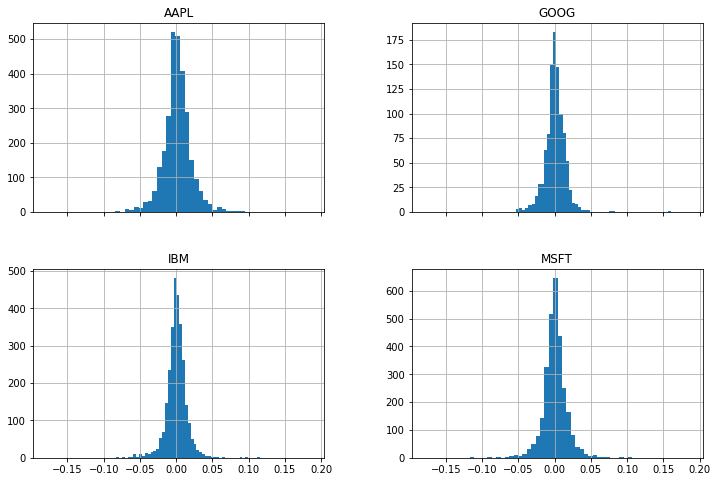

In [103]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj. Close']].reset_index().pivot('Date', 'Ticker', 'Adj. Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

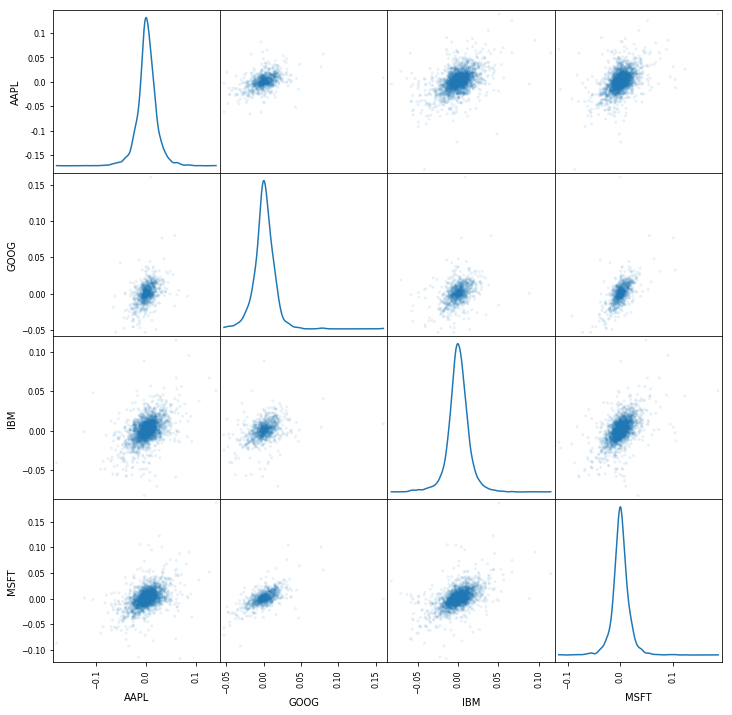

In [106]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

## 1.2. Moving Windows

Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series.


Date
2018-03-14    171.818375
2018-03-15    171.807125
2018-03-16    171.776125
2018-03-19    171.697125
2018-03-20    171.653125
2018-03-21    171.508875
2018-03-22    171.374500
2018-03-23    171.220250
2018-03-26    171.251750
2018-03-27    171.261250
Name: Adj. Close, dtype: float64


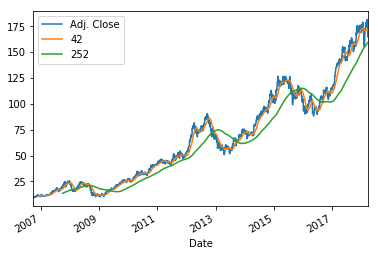

In [109]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj. Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])

# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj. Close', '42', '252']].plot()

# Show plot
plt.show()

We can clearly see here that as we increase the size of the window the plot becomes smoother and smoother.

## 1.3 Volatility Calculation

The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock’s volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.

The moving historical standard deviation of the log returns—i.e. the moving historical volatility—is more of interest here.

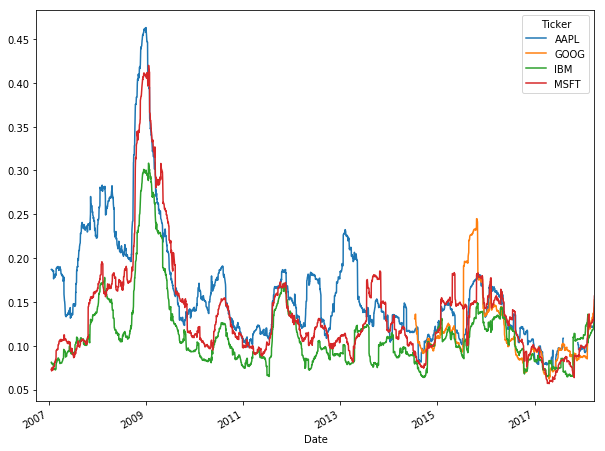

In [110]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

Note that the size of the window can and will change the overall result: if you take the window wider and make min_periods larger, your result will become less representative. If you make it smaller and make the window more narrow, the result will come closer to the standard deviation.

Considering all of this, you see that it’s definitely a skill to get the right window size based upon the data sampling frequency.

# 2. Building a Trading Strategy

There are basically two common trading strategies: the **momentum strategy** and **reversion strategy**.

Firstly, the **momentum strategy** is also called divergence or trend trading. When you follow this strategy, you do so because you believe the movement of a quantity will continue in its current direction. We believe in this strategy that stocks have momentum or upward or downward trends,that we can detect and exploit. 

Some examples of this strategy are the moving average crossover, the dual moving average crossover, and turtle trading:

  1. The **moving average crossover** is when the price of an asset moves from one side of moving              average to other. This cross-over represents a change in momentum and can be used as a point of        making the decision to enter or exit the market. I will work on an exmaple here which is the          'Hello World' of qauntitative trading.
    
  2. The **dual moving average cross-over** occurs when a short-term avergae crosses a long-term                average. This signal is used to identify that momentum is shifting in the direction of the            short-term average. A buy signal is generated when the short-term average crosses the long-term        average and rises above it, while a sell signal is triggered when short-term average crossing          the long-term average and falling below it.
  
  3. **Turtle trading** is a well-known strategy that was originally taught by Richard Dennis. The basic        strategy is to buy futures on a 20-day high and sell on a 20-day low.
    

Secondly, the **reversion strategy**, which is also known as convergence or cyclic trading. This strategy departs from the belief that the movement of a quantity will eventually reverse. For example, in **mean reversion strategy**, we believe that stocks return to their mean and that you can exploit when it deviates from  that mean.

Another example of this strategy, besides the mean reversion strategy, is the pairs trading mean-reversion, which is similar to the mean reversion strategy. Whereas the mean reversion strategy basically stated that stocks return to their mean, the pairs trading strategy extends this and states that if two stocks can be identified that have a relatively high correlation, the change in the difference in price between the two stocks can be used to signal trading events if one of the two moves out of correlation with the other. That means that if the correlation between two stocks has decreased, the stock with the higher price can be considered to be in a short position. It should be sold because the higher-priced stock will return to the mean. The lower-priced stock, on the other hand, will be in a long position because the price will rise as the correlation will return to normal.

Besides these two most frequent strategies, there are also other ones that you might come across once in a while, such as the forecasting strategy, which attempts to predict the direction or value of a stock, in this case, in subsequent future time periods based on certain historical factors. There’s also the High-Frequency Trading (HFT) strategy, which exploits the sub-millisecond market microstructure.

### 2.1 A Simple Trading Strategy

I will start with a 'hello world' of quantitative trading: the **moving average crossover**. I will create two seperate Simple Moving Averages(SMA) of a time series with differing lookback periods, let's say 40 and 100 days. If the short moving average exceeds the long moving average then we will go long, if the long moving average exceeds the short moving average then I will exit.  

Going long is when we think that the stock price will go up and will sell at a higher price in the future (buy signal); When I'll go short, I'll sell the stock, expecting that I can buy it back at a lower price and realize a profit (sell signal).

In [127]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

#Create Signals
signals['signal'][short_window:]=np.where(signals['short_mavg'][short_window:]>
                                          signals['long_mavg'][short_window:],1.0,0.0)

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals[40:])

            signal  short_mavg   long_mavg  positions
Date                                                 
2006-11-28     1.0   80.767000   80.622927        1.0
2006-11-29     1.0   81.210250   80.889048        0.0
2006-11-30     1.0   81.617250   81.139535        0.0
2006-12-01     1.0   82.029500   81.370909        0.0
2006-12-04     1.0   82.452000   81.587556        0.0
2006-12-05     1.0   82.868000   81.798043        0.0
2006-12-06     1.0   83.268500   81.968936        0.0
2006-12-07     1.0   83.613750   82.074583        0.0
2006-12-08     1.0   83.938750   82.200816        0.0
2006-12-11     1.0   84.282000   82.331800        0.0
2006-12-12     1.0   84.550500   82.406471        0.0
2006-12-13     1.0   84.919500   82.534231        0.0
2006-12-14     1.0   85.270000   82.647736        0.0
2006-12-15     1.0   85.488250   82.741667        0.0
2006-12-18     1.0   85.626250   82.791273        0.0
2006-12-19     1.0   85.747500   82.854107        0.0
2006-12-20     1.0   85.8402

When the **signal column** in the dataframe changes from **1** to **0** the **position** changes to **-1** which is a **sell** signal. Similarly, when the **signal** column in the dataframe changes from **0** to the **position** column changes to **+1** which is a **buy** signal. When the **position** is **0** then there is no buy/sell action taken.

#### Plotting the strategy

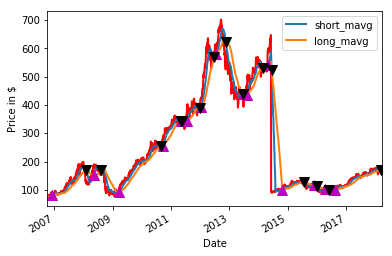

In [136]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

The **purple** **upward facing triangles** represent a **buy** signal and the **black downward facing triangles** represent a **sell** signal. 

Note: In this strategy we initiate a buy signal whenever the short term moving average exceeds the long term moving average and a sell signal is initiated whenever the long term moving average exceeds the short term moving average.

# 3. Backtesting the Trading Strategy

Now that we’ve got a trading strategy at hand, it’s a good idea to also backtest it and calculate its performance. 

Backtesting is, besides just “testing a trading strategy”, testing the strategy on relevant historical data to make sure that it’s an actual viable strategy before you start making moves. With backtesting, a trader can simulate and analyze the risk and profitability of trading with a specific strategy over a period of time. However, when you’re backtesting, it’s a good idea to keep in mind that there are some pitfalls, which might not be obvious to you when you’re just starting out.

For example, there are external events, such as market regime shifts, which are regulatory changes or macroeconomic events, which definitely influence your backtesting. Also, liquidity constraints, such as the ban of short sales, could affect your backtesting heavily.

Next, there are pitfalls which you might introduce yourself when you, for example, overfit a model (optimization bias), when you ignore strategy rules because you think it’s better like that (interference), or when you accidentally introduce information into past data (lookahead bias).

### Backtesting Components

The backtester usually consists of some four essential components, which should usually present in every backtester:
1. A data handler, which is an interface to a set of data,
2. A strategy, which generates a signal to go long or go short based on the data,
3. A portfolio, which generates orders and manages Profit & Loss (also known as “PnL”), and
4. An execution handler, which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.

### 3.1. Implementation of  a Simple Backtester

We’ll focus here how we can get started on creating a portfolio which can generate orders and manages the profit and loss.

In [138]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj. Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

            AAPL  holdings      cash     total  returns
Date                                                   
2006-10-02   0.0       0.0  100000.0  100000.0      NaN
2006-10-03   0.0       0.0  100000.0  100000.0      0.0
2006-10-04   0.0       0.0  100000.0  100000.0      0.0
2006-10-05   0.0       0.0  100000.0  100000.0      0.0
2006-10-06   0.0       0.0  100000.0  100000.0      0.0


#### Visualizing the portfolio value (result of backtesting)

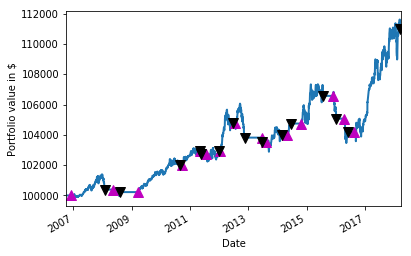

In [139]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

## Evaluating Moving Average Crossover Strategy 

First, we can use the **Sharpe ratio** to get to know whether the portfolio’s returns are the result of the fact that we decided to make smart investments or to take a lot of risks.

The ideal situation is, of course, that the returns are considerable but that the additional risk of investing is as small as possible. That’s why, the greater the portfolio’s Sharpe ratio, the better: the ratio between the returns and the additional risk that is incurred is quite OK. Usually, a ratio greater than 1 is acceptable by investors, 2 is very good and 3 is excellent.

In [145]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.633923217163


Next, we can also calculate a **Maximum Drawdown**, which is used to measure the the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy.

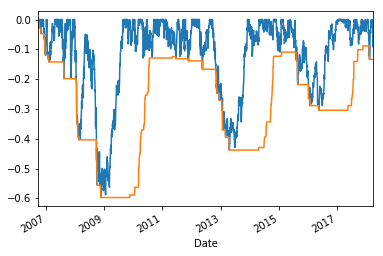

In [147]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj. Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj. Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()